In [21]:
from keras.datasets import mnist
from keras.preprocessing.image import *
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [22]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


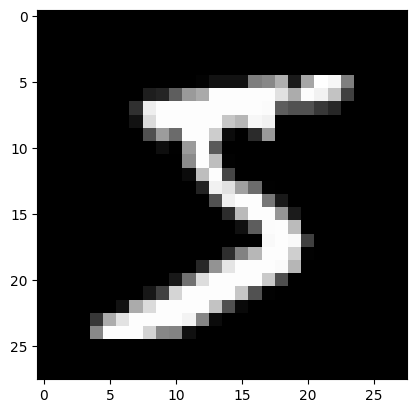

5


In [24]:
plt.imshow(X_train[0],cmap='gray')
plt.show()
print(y_train[0])

## Data Preprocessing

In [25]:
image_height,image_width =28,28

In [26]:
X_train= X_train.reshape(60000,image_height*image_width)
X_test= X_test.reshape(10000,image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [27]:
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')

In [28]:
X_train /=255.0
X_test /=255.0

In [29]:
y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)
print(y_train.shape)
(y_test.shape)

(60000, 10)


(10000, 10)

## Building Model

In [38]:
model= Sequential()
model.add(Dense(512,activation='relu',name='HL1',input_shape=(784,)))
model.add(Dense(512,activation='relu',name='HL2',))
model.add(Dense(10,activation='softmax',name='OL',))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 512)               401920    
                                                                 
 HL2 (Dense)                 (None, 512)               262656    
                                                                 
 OL (Dense)                  (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [31]:
print(784*512+512)
print(512*512+512)
print(512*10+10)

401920
262656
5130


In [39]:
history= model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1846 - accuracy: 0.9435 - val_loss: 0.0954 - val_accuracy: 0.9693
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0818 - accuracy: 0.9751 - val_loss: 0.0850 - val_accuracy: 0.9726
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0559 - accuracy: 0.9828 - val_loss: 0.0782 - val_accuracy: 0.9763
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0418 - accuracy: 0.9865 - val_loss: 0.0864 - val_accuracy: 0.9757
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0853 - val_accuracy: 0.9765
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0964 - val_accuracy: 0.9784
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0255 - accuracy: 0.9923 - val_loss: 0.0859 - val_accuracy:

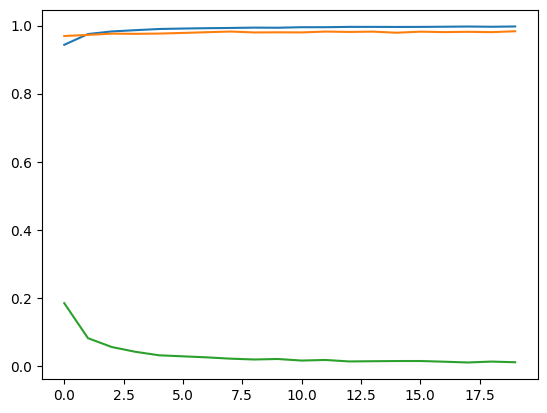

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

In [44]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9833


[0.13566234707832336, 0.983299970626831]

In [45]:
model.save("mnist_save")

INFO:tensorflow:Assets written to: mnist_save\assets


INFO:tensorflow:Assets written to: mnist_save\assets
